## Microsoft Movie Analysis
#### Sidney Kung
(Add picture of Microsoft brand header)

### Business Problem
Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with exploring what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### Overview
This project analyzes ... using ... method ... using .... data.

In [17]:
# importing the necessary pandas and matplotlib libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

### Understanding the Data

The DataFrame was complied by combining four data sets from the websites IMDB and TMDB. Each dataset contained useful information about movies. I cleaned the datasets before merging them and importing them for analysis.

Origin file names:
- imdb.title.basics.csv.gz
- imdb.title.ratings.csv.gz
- tmdb.movies.csv.gz
- tn.movie_budgets.csv.gz

In [18]:
# loading all_movies_df & setting it to the variable all_movies
all_movies = pd.read_csv('all_movies_df.csv')


In [34]:
# viewing first 5 rows of imdb.title.basics
all_movies.head()


,Unnamed: 0,imdb_tconst,primary_title,imdb_orig_title,start_year,runtime_minutes,genres,imdb_avg_rating,imdb_numvotes,db_genre_ids,...,original_language,db_orig_title,db_popularity,release_date_x,db_vote_avg,db_vote_count,production_budget,domestic_gross,worldwide_gross,release_month
0,0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,"[35, 18]",...,en,The Other Side of the Wind,9.800,2018-11-02,7.0,64,NaN,NaN,NaN,11
1,1,tt0112502,Bigfoot,Bigfoot,2017,91.0,"Horror,Thriller",4.1,32.0,"[27, 878, 12]",...,en,Bigfoot,2.813,2012-06-30,2.9,26,NaN,NaN,NaN,6
2,4,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72.0,[18],...,en,Heaven & Hell,0.600,2018-11-06,7.5,2,NaN,NaN,NaN,11
3,5,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,"[16, 28, 35, 10751]",...,en,Foodfight!,4.705,2013-05-07,2.1,46,"$45,000,000",0,"$73,706",5
4,6,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123.0,"[35, 18]",...,en,Return to Babylon,0.877,2013-08-11,7.0,1,NaN,NaN,NaN,8


In [35]:
all_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14947 entries, 0 to 14946
Data columns (total 21 columns):
Unnamed: 0           14947 non-null int64
imdb_tconst          14947 non-null object
primary_title        14947 non-null object
imdb_orig_title      14947 non-null object
start_year           14947 non-null int64
runtime_minutes      14947 non-null float64
genres               14947 non-null object
imdb_avg_rating      14947 non-null float64
imdb_numvotes        14947 non-null float64
db_genre_ids         14947 non-null object
db_id_x              14947 non-null int64
original_language    14947 non-null object
db_orig_title        14947 non-null object
db_popularity        14947 non-null float64
release_date_x       14947 non-null object
db_vote_avg          14947 non-null float64
db_vote_count        14947 non-null int64
production_budget    1789 non-null object
domestic_gross       1789 non-null object
worldwide_gross      1789 non-null object
release_month        14947 non-nu

In [32]:
all_movies.describe(include='all')

,Unnamed: 0,imdb_tconst,primary_title,imdb_orig_title,start_year,runtime_minutes,genres,imdb_avg_rating,imdb_numvotes,db_genre_ids,...,original_language,db_orig_title,db_popularity,release_date_x,db_vote_avg,db_vote_count,production_budget,domestic_gross,worldwide_gross,release_month
count,14947.000000,14947,14947,14947,14947.000000,14947.000000,14947,14947.000000,1.494700e+04,14947,...,14947,14947,14947.000000,14947,14947.000000,14947.000000,1789,1789,1789,14947.000000
unique,NaN,14947,14947,14922,NaN,NaN,602,NaN,NaN,1693,...,70,14944,NaN,2926,NaN,NaN,281,1578,1643,NaN
top,NaN,tt3263614,Sabotage,Stranded,NaN,NaN,Documentary,NaN,NaN,[99],...,en,The Visit,NaN,2010-01-01,NaN,NaN,"$10,000,000",0,$0,NaN
freq,NaN,1,1,3,NaN,NaN,1528,NaN,NaN,2077,...,12997,2,NaN,148,NaN,NaN,73,211,146,NaN
mean,13867.117281,NaN,NaN,NaN,2013.980866,93.778551,NaN,5.886452,1.476590e+04,NaN,...,NaN,NaN,3.749306,NaN,5.788928,261.347561,NaN,NaN,NaN,6.320666
std,6838.300644,NaN,NaN,NaN,2.551209,24.125809,NaN,1.367469,6.401125e+04,NaN,...,NaN,NaN,4.862624,NaN,1.746876,1113.807869,NaN,NaN,NaN,3.507310
min,0.000000,NaN,NaN,NaN,2010.000000,1.000000,NaN,1.100000,5.000000e+00,NaN,...,NaN,NaN,0.600000,NaN,0.000000,1.000000,NaN,NaN,NaN,1.000000
25%,8194.500000,NaN,NaN,NaN,2012.000000,85.000000,NaN,5.100000,1.220000e+02,NaN,...,NaN,NaN,0.660000,NaN,5.000000,2.000000,NaN,NaN,NaN,3.000000
50%,14676.000000,NaN,NaN,NaN,2014.000000,91.000000,NaN,6.000000,4.730000e+02,NaN,...,NaN,NaN,1.719000,NaN,6.000000,8.000000,NaN,NaN,NaN,6.000000
75%,19854.500000,NaN,NaN,NaN,2016.000000,101.000000,NaN,6.900000,2.746500e+03,NaN,...,NaN,NaN,5.483000,NaN,6.900000,49.000000,NaN,NaN,NaN,10.000000


## Analysis

### 1. Average Domestic Gross Each Month
#### (Optimal Release Times During the Year)

In [ ]:
# Cleaning the data before making graph

# removing $ from domestic_gross
all_movies['domestic_gross'] = all_movies['domestic_gross'].str.replace(',', '')
all_movies['domestic_gross'] = all_movies['domestic_gross'].str.replace('$', '')

# converting values in domestic_gross to float
all_movies['domestic_gross'] = all_movies['domestic_gross'].apply(lambda x: float(x))

# creating a new column of release dates without year
all_movies['release_month'] = pd.DatetimeIndex(all_movies['release_date_x']).month

In [43]:
d_gross

release_month
1     3.796232e+07
2     4.645749e+07
3     4.067798e+07
4     4.014231e+07
5     7.477903e+07
6     7.367807e+07
7     6.707287e+07
8     3.711666e+07
9     3.479887e+07
10    2.517063e+07
11    6.142186e+07
12    6.339771e+07
Name: domestic_gross, dtype: float64

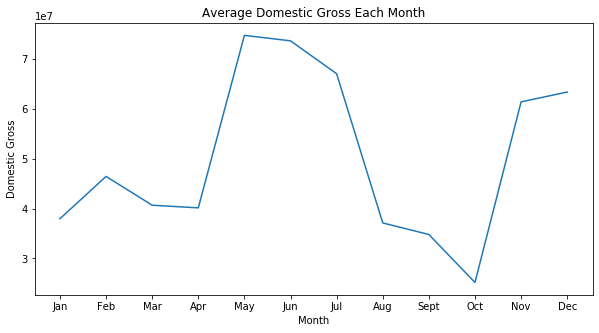

In [62]:
# create a line graph

# sorting dataframe by months and setting that equal to months
all_movies.sort_values(by='release_month', ascending=True)
months = sorted(all_movies['release_month'].unique())
# setting the mean of domestic_gross to d_gross
d_gross = all_movies.groupby('release_month')['domestic_gross'].mean()

# creating the plot
fig, ax = plt.subplots(figsize=(10,5))
months_plot = ax.plot(months, d_gross)

ax.set_xlabel('Month')
ax.set_ylabel('Domestic Gross')
ax.set_title('Average Domestic Gross Each Month')

ax.set_xticks((1,2,3,4,5,6,7,8,9,10,11,12))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

# ax.set_yticks((3,4,5,6,7,8))
# ax.set_yticklabels(['4.067798e+07', '4.014231e+07', '7.477903e+07', '6.707287e+07', '3.711666e+07', '3.711666e+07'])

# renaming each axis tick by month name
plt.show()

### 2. Relationship between production_budget and domestic_gross

### 3. Relationship between runtime_minutes and production_budget

### 4. Relationship between rating and domestic_gross

### 5. Relationship between genre and rating

## Conclusions

## Next Steps
Further analyses could yield additional insights to further improve operations at AAC:

- Better prediction of animals that are likely to have long stays. This modeling could use already available data, such as breed and intake condition.

- Model need for medical support. This modeling could predict the need for specialized personnel to address animals' medical needs, including neutering, using intake condition and sex data.
- Predicting undesirable outcomes. This modeling could identify animals that are more likely to have undesirable outcomes (e.g. Euthanasia) for targeted medical support or outreach.